In [1]:
# import libraries
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print("shape of cancer data:", cancer.data.shape)

shape of cancer data: (569, 30)


In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# count the number of malignant and begning samples
# 1 - benign
sum(cancer.target)
# 0 - malignant
len(cancer.target) - sum(cancer.target)
sample_count = {'benign': sum(cancer.target),
                'malignant': len(cancer.target) - sum(cancer.target)}
sample_count

{'benign': 357, 'malignant': 212}

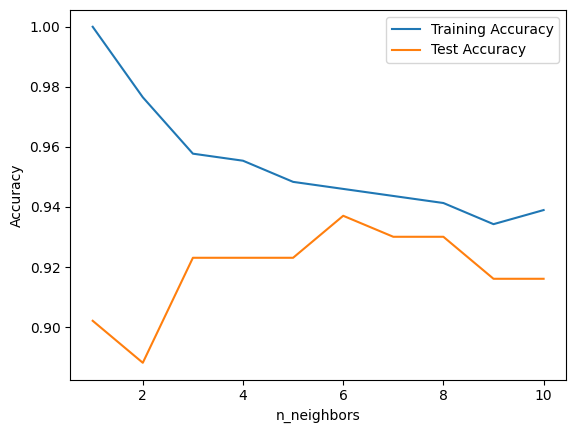

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record test accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
# plot the training and test accuracy using a line graph
plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [7]:
# using logistic regression to classify cancer data
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression().fit(X_train, y_train)

print("Training Set Score: {:.3f}".format(logi.score(X_train, y_train)))
print("Test Set Score: {:.3f}".format(logi.score(X_test, y_test)))


Training Set Score: 0.962
Test Set Score: 0.937


/Users/daram/Desktop/Intro-to-machine-learning-with-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

diabetes = load_diabetes()




In [9]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [10]:
diabetes.data.shape

(442, 10)

In [11]:
diabetes.target.shape

(442,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept:", lr.intercept_)

lr.coef_: [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
lr.intercept: 151.6651755919933


In [13]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.52
Test set score: 0.48


In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.43
Test set score: 0.44


In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))

Training set score: 0.35
Test set score: 0.38


In [16]:
# how many coefficients have been reduced to 0 in the lasso model?
sum(lasso.coef_ == 0)

# this means the model is only using 3 features to estimate, which does not result in a good prediction.

7

In [17]:
lasso.coef_

array([  0.        ,  -0.        , 398.3858307 ,  46.17542123,
         0.        ,   0.        ,  -0.        ,   0.        ,
       238.18730888,   0.        ])

In [18]:
import numpy as np

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.52
Test set score: 0.48
Number of features used: 10


In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [20]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [21]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target,
    random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [25]:
 from sklearn.ensemble import GradientBoostingClassifier
 
 X_train, X_test, y_train, y_test = train_test_split(
     cancer.data,
     cancer.target,
     random_state=0
 )
 
 gbrt = GradientBoostingClassifier(random_state=0)
 gbrt.fit(X_train, y_train)
 
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [27]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
 
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [28]:
gbrt.feature_importances_

array([0.00000000e+00, 9.07529959e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.32035766e-03, 2.65686907e-01,
       3.49588341e-04, 0.00000000e+00, 0.00000000e+00, 3.00083378e-04,
       0.00000000e+00, 1.45838255e-02, 1.05083243e-03, 0.00000000e+00,
       4.75469106e-03, 0.00000000e+00, 9.56890421e-04, 0.00000000e+00,
       9.23939383e-03, 1.61819935e-02, 3.22495788e-01, 9.24249926e-02,
       6.44041105e-03, 0.00000000e+00, 6.85101108e-03, 2.31450675e-01,
       6.41500790e-03, 3.42225071e-03])

In [30]:
gbrt.feature_names_in_

AttributeError: 'GradientBoostingClassifier' object has no attribute 'feature_names_in_'